In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, MaxPooling2D, Flatten, Conv2D, Input, AveragePooling2D, ReLU, Add
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l2
import keras
from keras.models import Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import torch

Using TensorFlow backend.


# Load and Process Data
- Offline, this data was unzipped and then each of the two classes was separated into training, testing and validation (about 10% for validation, 10% for testing, and the reaminder for training)
- After sorting into training, test, and validation, the data was re-zipped for easy uploading to Colab Notebooks
- Below is the code to unzip to their sorted folders with the training, testing, and validation folders each consisting of a folder of data for each of the two classes

In [2]:
!unzip cell_images.zip

Streaming output truncated to the last 5000 lines.
  inflating: cell_images/train/Uninfected/C84P45ThinF_IMG_20150818_104156_cell_107.png  
  inflating: cell_images/train/Uninfected/C85P46ThinF_IMG_20150820_105301_cell_124.png  
  inflating: cell_images/train/Uninfected/C85P46ThinF_IMG_20150820_105748_cell_123.png  
  inflating: cell_images/train/Uninfected/C85P46ThinF_IMG_20150820_110143_cell_135.png  
  inflating: cell_images/train/Uninfected/C85P46ThinF_IMG_20150820_110143_cell_154.png  
  inflating: cell_images/train/Uninfected/C85P46ThinF_IMG_20150820_110143_cell_201.png  
  inflating: cell_images/train/Uninfected/C86P47ThinF_IMG_20150820_123717_cell_98.png  
  inflating: cell_images/train/Uninfected/C86P47ThinF_IMG_20150820_124025_cell_43.png  
  inflating: cell_images/train/Uninfected/C86P47ThinF_IMG_20150820_124025_cell_56.png  
  inflating: cell_images/train/Uninfected/C86P47ThinF_IMG_20150820_124259_cell_159.png  
  inflating: cell_images/train/Uninfected/C86P47ThinF_IMG_2015

# 3.1 - Baseline model
- No Residual Connections
- Use batch normalization

In [3]:
# Normalize across the 3 channels
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
 
train_folder = './cell_images/train'
test_folder = './cell_images/test'
val_folder = './cell_images/validation'

max_height = 250
max_width = 250

train_generator = train_datagen.flow_from_directory(
        train_folder,
        target_size=(max_height, max_width),
        batch_size=32,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_folder,
        target_size=(max_height, max_width),
        batch_size=1,
        class_mode='binary')

val_generator = val_datagen.flow_from_directory(
        val_folder,
        target_size=(max_height, max_width),
        batch_size=32,
        class_mode='binary')

Found 22322 images belonging to 2 classes.
Found 2756 images belonging to 2 classes.
Found 2480 images belonging to 2 classes.


# Visualize Data Samples

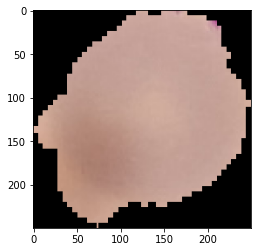

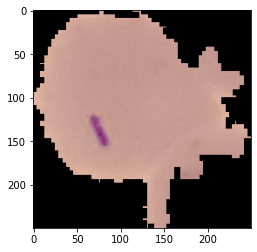

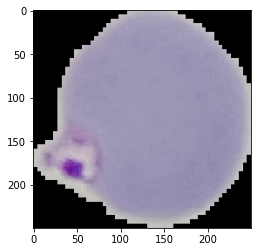

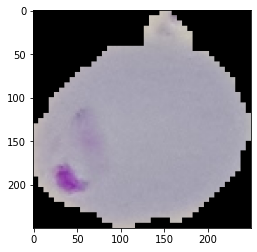

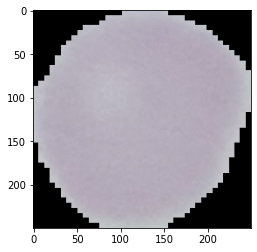

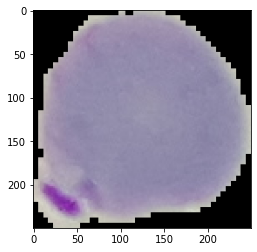

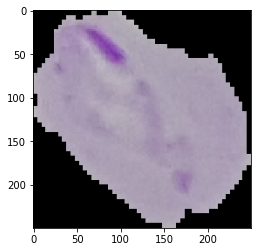

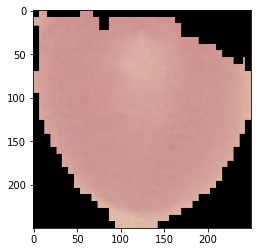

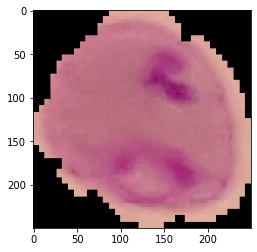

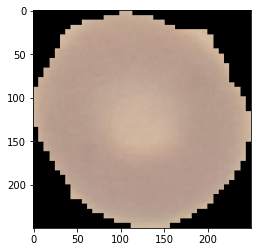

In [0]:
current_batch = train_generator.next()[0]
for i in range(10):
  plt.imshow(current_batch[i,:,:,:])
  plt.show()

# Define model structure and compile model

In [0]:
# Start with a convolutional layer without residual connection
# Use batch normalization
cnn = Sequential()

# Four convolutional layers with maxpooling and batch normalization after
# activation
cnn.add(Conv2D(32, kernel_size=(3, 3), input_shape=(max_height, max_width, 3)))
cnn.add(Activation('relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(32, kernel_size=(3, 3), kernel_regularizer=l2(0.01)))
cnn.add(Activation('relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(64, kernel_size=(3, 3), kernel_regularizer=l2(0.01)))
cnn.add(Activation('relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(64, kernel_size=(3, 3)))
cnn.add(Activation('relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and add a fully connected layer
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))

# Prediction/Output layer
# Sigmoid activation as binary classification
cnn.add(Dense(1, activation='sigmoid'))

# Compile and Model Summary

In [0]:
cnn.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

print(cnn.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 248, 248, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 248, 248, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 248, 248, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 122, 122, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 122, 122, 32)      0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 122, 122, 32)     

# Train Model

In [0]:
nb_epoch = 10
hist_little_convet = cnn.fit_generator(train_generator,
              validation_data=val_generator, 
              initial_epoch=0, 
              verbose=1, 
              epochs=nb_epoch)

Epoch 1/10
698/698 [==============================] - 72s 103ms/step - loss: 0.5666 - accuracy: 0.8979 - val_loss: 0.1147 - val_accuracy: 0.9411
Epoch 2/10
698/698 [==============================] - 63s 91ms/step - loss: 0.2005 - accuracy: 0.9467 - val_loss: 0.1362 - val_accuracy: 0.9278
Epoch 3/10
698/698 [==============================] - 64s 91ms/step - loss: 0.1626 - accuracy: 0.9526 - val_loss: 0.2116 - val_accuracy: 0.9448
Epoch 4/10
698/698 [==============================] - 64s 91ms/step - loss: 0.1469 - accuracy: 0.9559 - val_loss: 0.2203 - val_accuracy: 0.8980
Epoch 5/10
698/698 [==============================] - 63s 91ms/step - loss: 0.1409 - accuracy: 0.9570 - val_loss: 0.0350 - val_accuracy: 0.9556
Epoch 6/10
698/698 [==============================] - 63s 91ms/step - loss: 0.1301 - accuracy: 0.9601 - val_loss: 0.0825 - val_accuracy: 0.9423
Epoch 7/10
698/698 [==============================] - 63s 90ms/step - loss: 0.1228 - accuracy: 0.9625 - val_loss: 0.0524 - val_accuracy

# Training and Validation Metrics

In [0]:
training_data = pd.DataFrame(hist_little_convet.history)
val_loss = training_data['val_loss']
val_accuracy = training_data['val_accuracy']
train_loss = training_data['loss']
train_accuracy = training_data['accuracy']

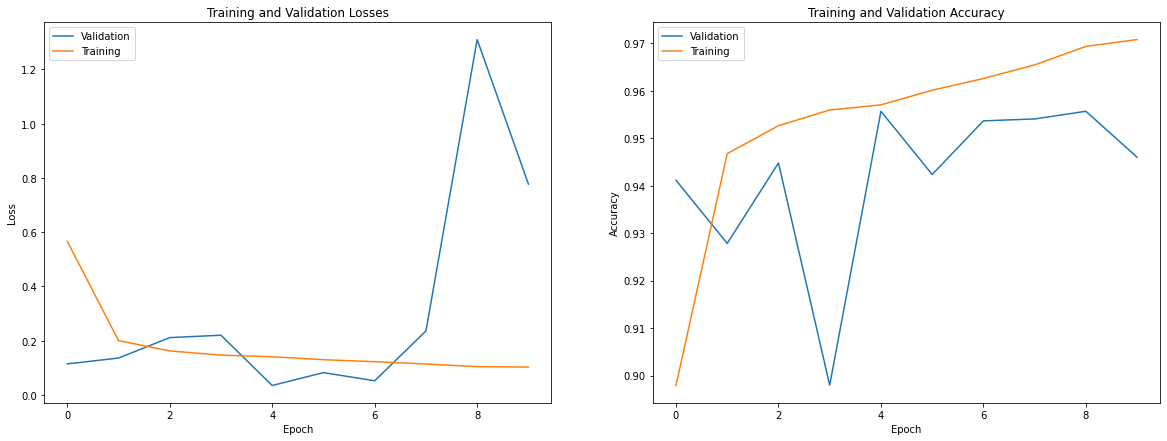

In [0]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))
ax1, ax2 = ax.ravel()

ax1.plot(val_loss, label='Validation')
ax1.plot(train_loss, label='Training')
ax1.set_title('Training and Validation Losses')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(val_accuracy, label='Validation')
ax2.plot(train_accuracy, label='Training')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
plt.show()

# Evaluate on Validation

In [0]:
accuracy = cnn.evaluate_generator(val_generator, verbose=1)
print(f'Validation Accuracy {accuracy[1]}')

78/78 [==============================] - 4s 57ms/step
Validation Accuracy 0.9459677338600159


# 3.2 - Add in Data Augmentation 

In [4]:
# Update data generators with augmentation 
# Augment train data, not validation and test
train_datagen_aug = ImageDataGenerator(rescale=1./255, vertical_flip=True,
                                       horizontal_flip=True,
                                       fill_mode='reflect', shear_range=0.2,
                                       zoom_range=0.2, rotation_range=45)
train_generator_aug = train_datagen_aug.flow_from_directory(
        train_folder,
        target_size=(max_height, max_width),
        batch_size=32,
        class_mode='binary')

Found 22322 images belonging to 2 classes.


In [0]:
# Start with a convolutional layer without residual connection
# Use batch normalization
cnn_aug = Sequential()

# Four convolutional layers with maxpooling and batch normalization after
# activation
cnn_aug.add(Conv2D(32, kernel_size=(3, 3), input_shape=(max_height, max_width, 3)))
cnn_aug.add(Activation('relu'))
cnn_aug.add(BatchNormalization())
cnn_aug.add(MaxPooling2D(pool_size=(2, 2)))

cnn_aug.add(Conv2D(32, kernel_size=(3, 3), kernel_regularizer=l2(0.01)))
cnn_aug.add(Activation('relu'))
cnn_aug.add(BatchNormalization())
cnn_aug.add(MaxPooling2D(pool_size=(2, 2)))

cnn_aug.add(Conv2D(64, kernel_size=(3, 3), kernel_regularizer=l2(0.01)))
cnn_aug.add(Activation('relu'))
cnn_aug.add(BatchNormalization())
cnn_aug.add(MaxPooling2D(pool_size=(2, 2)))

cnn_aug.add(Conv2D(64, kernel_size=(3, 3)))
cnn_aug.add(Activation('relu'))
cnn_aug.add(BatchNormalization())
cnn_aug.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and add a fully connected layer
cnn_aug.add(Flatten())
cnn_aug.add(Dense(64, activation='relu'))

# Prediction/Output layer
# Sigmoid activation as binary classification
cnn_aug.add(Dense(1, activation='sigmoid'))

In [6]:
cnn_aug.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

print(cnn_aug.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 248, 248, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 248, 248, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 248, 248, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 122, 122, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 122, 122, 32)      0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 122, 122, 32)     

# Train Model with Augmentation

In [7]:
nb_epoch = 10
hist_little_convet = cnn_aug.fit_generator(train_generator_aug,
              validation_data=val_generator, 
              initial_epoch=0, 
              verbose=1, 
              epochs=nb_epoch)

Epoch 1/10
698/698 [==============================] - 293s 419ms/step - loss: 0.6486 - accuracy: 0.8557 - val_loss: 0.1898 - val_accuracy: 0.9403
Epoch 2/10
698/698 [==============================] - 286s 410ms/step - loss: 0.2508 - accuracy: 0.9310 - val_loss: 0.1213 - val_accuracy: 0.9423
Epoch 3/10
698/698 [==============================] - 286s 409ms/step - loss: 0.2214 - accuracy: 0.9358 - val_loss: 0.3770 - val_accuracy: 0.9335
Epoch 4/10
698/698 [==============================] - 285s 409ms/step - loss: 0.2004 - accuracy: 0.9413 - val_loss: 0.0649 - val_accuracy: 0.9379
Epoch 5/10
698/698 [==============================] - 285s 408ms/step - loss: 0.1939 - accuracy: 0.9436 - val_loss: 0.1576 - val_accuracy: 0.9460
Epoch 6/10
698/698 [==============================] - 285s 409ms/step - loss: 0.1892 - accuracy: 0.9451 - val_loss: 0.0651 - val_accuracy: 0.9601
Epoch 7/10
698/698 [==============================] - 285s 409ms/step - loss: 0.1827 - accuracy: 0.9468 - val_loss: 0.1990 -

# Display training and validation metrics

In [0]:
training_data = pd.DataFrame(hist_little_convet.history)
val_loss = training_data['val_loss']
val_accuracy = training_data['val_accuracy']
train_loss = training_data['loss']
train_accuracy = training_data['accuracy']

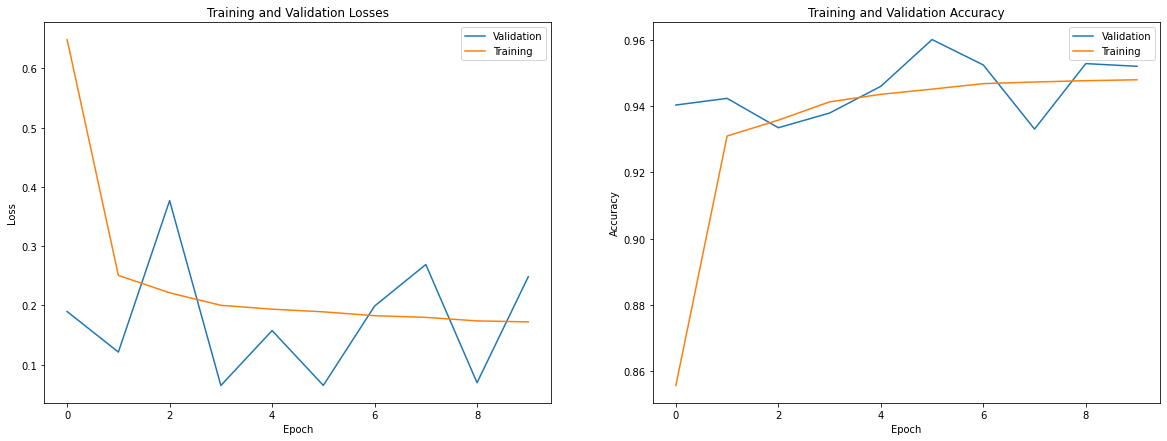

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))
ax1, ax2 = ax.ravel()

ax1.plot(val_loss, label='Validation')
ax1.plot(train_loss, label='Training')
ax1.set_title('Training and Validation Losses')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(val_accuracy, label='Validation')
ax2.plot(train_accuracy, label='Training')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
plt.show()

# Evaluate on Validation Set

In [8]:
accuracy = cnn_aug.evaluate_generator(val_generator, verbose=1)
print(f'Validation Accuracy {accuracy[1]}')

78/78 [==============================] - 4s 58ms/step
Validation Accuracy 0.9520161151885986


# Evaluate the best of the two models on the test set

In [15]:
accuracy = cnn_aug.evaluate_generator(test_generator, verbose=1)
print(f'Test Accuracy {accuracy[1]}')

2756/2756 [==============================] - 11s 4ms/step
Test Accuracy 0.9524673223495483


# How much can you improve your original model with data augmentaion?

The two CNNs (without augmentation and then with augmentation), were both evaluated on the validation set. The model trained with augmented data resulted in a higher validation score, reducing the original error from 5.4% to 4.798%, thereby resulting in improved model performance. As the model trained with augmented data was better compared of the two, it was then evalauted on the test set, resulting in a testing accuracy of 95.2467%. Data augmentation essentially adds variation to the training data to fill the holes or unobserved values from the training distribution. Thus, by adding it during training, while training scores may be lower, validation and testing scores are generally higher, as seen above. For the last part of Task 3, augmentation will also be used.

# 3.3 Train a deeper network

## First, train a deep model with residual connections

In [0]:
# Implement a resnet block with skip connections
def res_net_block(x, filters):
  y = Conv2D(kernel_size=(3,3),
              strides=1,
              filters=filters,
              bias_regularizer=l2(0.01),
              kernel_regularizer=l2(0.01),
              padding="same")(x)
  relu = ReLU()(y)
  bn = BatchNormalization()(relu)

  y = Conv2D(kernel_size=(3,3),
              strides=1,
              filters=filters,
              bias_regularizer=l2(0.01),
              kernel_regularizer=l2(0.01),
              padding="same")(bn)
  y = ReLU()(y)
  y = BatchNormalization()(y)

  x = Conv2D(kernel_size=1, filters=filters, strides=1, padding="same")(x)
  out = Add()([x, y])
  return out

def build_skip_model():
  num_blocks = 3
  num_res_net_blocks = 3
  num_filters = [32, 64, 128]

  # Define modle input
  model_input = Input(shape=(max_width, max_height, 3))

  # Modify initial input 
  output = Conv2D(kernel_size=(7,7),
              strides=1,
              bias_regularizer=l2(0.01),
              kernel_regularizer=l2(0.01),
              filters=32,
              padding="same")(model_input)
  output = ReLU()(output)
  output = BatchNormalization()(output)

  # Go through multiple residual connections
  for i in range(num_blocks):
    for j in range(num_res_net_blocks):
      output = res_net_block(output, num_filters[i])
    output = MaxPooling2D(pool_size=(2, 2))(output)

  # Final pooling
  output = AveragePooling2D(4)(output)
  output = Flatten()(output)

  # Dense layer and output
  output = Dense(64, activation='relu')(output)
  final_ouput = Dense(1, activation='sigmoid')(output)
    
  # Compile and return model
  model = Model(model_input, final_ouput)
  model.compile(
      optimizer='adam',
      loss='binary_crossentropy',
      metrics=['accuracy']
  )
  return model


In [10]:
skip_conn_model = build_skip_model()
skip_conn_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 250, 250, 3)  0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 250, 250, 32) 4736        input_1[0][0]                    
__________________________________________________________________________________________________
re_lu_1 (ReLU)                  (None, 250, 250, 32) 0           conv2d_5[0][0]                   
__________________________________________________________________________________________________
batch_normalization_5 (BatchNor (None, 250, 250, 32) 128         re_lu_1[0][0]                    
____________________________________________________________________________________________

In [0]:
train_datagen_aug = ImageDataGenerator(rescale=1./255, vertical_flip=True,
                                       horizontal_flip=True,
                                       fill_mode='reflect', shear_range=0.2,
                                       zoom_range=0.2, rotation_range=45)
train_generator_aug = train_datagen_aug.flow_from_directory(
        train_folder,
        target_size=(max_height, max_width),
        batch_size=16,
        class_mode='binary')

Found 22322 images belonging to 2 classes.


# Train the deep model with residual connections

In [0]:
nb_epoch = 10
hist_little_convet = skip_conn_model.fit_generator(train_generator_aug,
              validation_data=val_generator, 
              initial_epoch=0, 
              verbose=1, 
              epochs=nb_epoch)

Epoch 1/10
1396/1396 [==============================] - 421s 301ms/step - loss: 1.0384 - accuracy: 0.8686 - val_loss: 0.4203 - val_accuracy: 0.8488
Epoch 2/10
1396/1396 [==============================] - 402s 288ms/step - loss: 0.4155 - accuracy: 0.9110 - val_loss: 0.2049 - val_accuracy: 0.8980
Epoch 3/10
1396/1396 [==============================] - 404s 289ms/step - loss: 0.3371 - accuracy: 0.9215 - val_loss: 0.3621 - val_accuracy: 0.9206
Epoch 4/10
1396/1396 [==============================] - 403s 289ms/step - loss: 0.3725 - accuracy: 0.9182 - val_loss: 0.6269 - val_accuracy: 0.6960
Epoch 5/10
1396/1396 [==============================] - 417s 298ms/step - loss: 0.3168 - accuracy: 0.9216 - val_loss: 0.1916 - val_accuracy: 0.8790
Epoch 6/10
1396/1396 [==============================] - 407s 292ms/step - loss: 0.3899 - accuracy: 0.9195 - val_loss: 0.1594 - val_accuracy: 0.9343
Epoch 7/10
1396/1396 [==============================] - 400s 287ms/step - loss: 0.3234 - accuracy: 0.9234 - val_

In [0]:
training_data = pd.DataFrame(hist_little_convet.history)
val_loss = training_data['val_loss']
val_accuracy = training_data['val_accuracy']
train_loss = training_data['loss']
train_accuracy = training_data['accuracy']

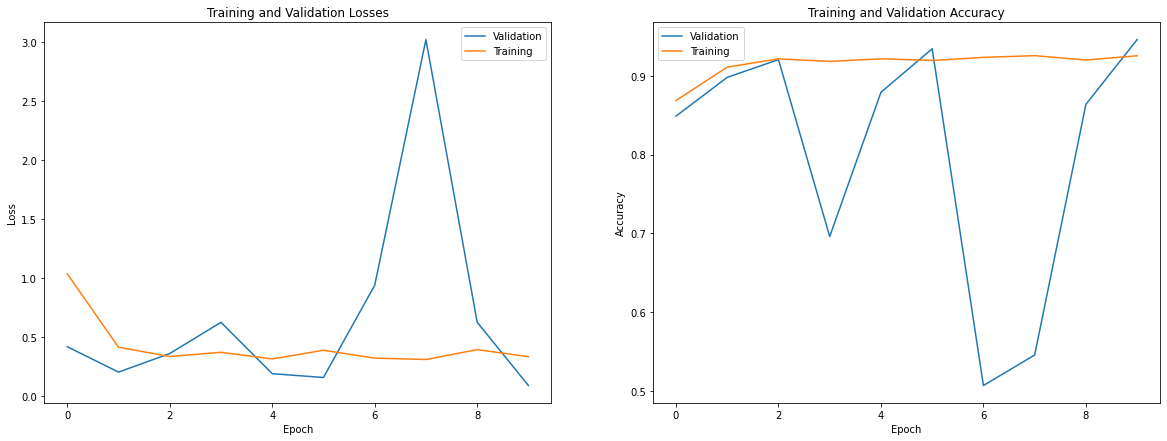

In [0]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))
ax1, ax2 = ax.ravel()

ax1.plot(val_loss, label='Validation')
ax1.plot(train_loss, label='Training')
ax1.set_title('Training and Validation Losses')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(val_accuracy, label='Validation')
ax2.plot(train_accuracy, label='Training')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
plt.show()

# Evaluate on the validation set

In [0]:
accuracy = skip_conn_model.evaluate_generator(val_generator, verbose=1)
print(f'Validation Accuracy {accuracy[1]}')

78/78 [==============================] - 11s 142ms/step
Validation Accuracy 0.9459677338600159


## Then, setup train the same model with no skip connections

In [0]:
# Implement a resnet block with NO skip connections
def res_net_block(x, filters):
  y = Conv2D(kernel_size=(3,3),
              strides=1,
              filters=filters,
              bias_regularizer=l2(0.01),
              kernel_regularizer=l2(0.01),
              padding="same")(x)
  relu = ReLU()(x)
  bn = BatchNormalization()(relu)

  y = Conv2D(kernel_size=(3,3),
              strides=1,
              filters=filters,
              bias_regularizer=l2(0.01),
              kernel_regularizer=l2(0.01),
              padding="same")(bn)
  y = ReLU()(y)
  out = BatchNormalization()(y)
  return out

def build_no_skip_model():
  num_blocks = 3
  num_res_net_blocks = 3
  num_filters = [32, 64, 128]

  # Define modle input
  model_input = Input(shape=(max_width, max_height, 3))

  # Modify initial input 
  output = Conv2D(kernel_size=(7,7),
              strides=1,
              bias_regularizer=l2(0.01),
              kernel_regularizer=l2(0.01),
              filters=32,
              padding="same")(model_input)
  output = ReLU()(output)
  output = BatchNormalization()(output)

  # Go through multiple residual connections
  for i in range(num_blocks):
    for j in range(num_res_net_blocks):
      output = res_net_block(output, num_filters[i])
    output = MaxPooling2D(pool_size=(2, 2))(output)

  # Final pooling
  output = AveragePooling2D(4)(output)
  output = Flatten()(output)

  # Dense layer and output
  output = Dense(64, activation='relu')(output)
  final_ouput = Dense(1, activation='sigmoid')(output)
    
  # Compile and return model
  model = Model(model_input, final_ouput)
  model.compile(
      optimizer='adam',
      loss='binary_crossentropy',
      metrics=['accuracy']
  )
  return model


In [12]:
no_skip_conn_model = build_no_skip_model()
no_skip_conn_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 250, 250, 3)       0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 250, 250, 32)      4736      
_________________________________________________________________
re_lu_20 (ReLU)              (None, 250, 250, 32)      0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 250, 250, 32)      128       
_________________________________________________________________
re_lu_21 (ReLU)              (None, 250, 250, 32)      0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 250, 250, 32)      128       
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 250, 250, 32)      9248

# Train the deep network with no residual connections

In [0]:
nb_epoch = 10
hist_little_convet = no_skip_conn_model.fit_generator(train_generator_aug,
              validation_data=val_generator, 
              initial_epoch=0, 
              verbose=1, 
              epochs=nb_epoch)

Epoch 1/10
1396/1396 [==============================] - 454s 325ms/step - loss: 1.6935 - accuracy: 0.8082 - val_loss: 1.1517 - val_accuracy: 0.5000
Epoch 2/10
1396/1396 [==============================] - 449s 321ms/step - loss: 0.4652 - accuracy: 0.9177 - val_loss: 0.8800 - val_accuracy: 0.8069
Epoch 3/10
1396/1396 [==============================] - 448s 321ms/step - loss: 0.4268 - accuracy: 0.9219 - val_loss: 1.1838 - val_accuracy: 0.5956
Epoch 4/10
1396/1396 [==============================] - 452s 324ms/step - loss: 0.4025 - accuracy: 0.9253 - val_loss: 0.8288 - val_accuracy: 0.7915
Epoch 5/10
1396/1396 [==============================] - 451s 323ms/step - loss: 0.4470 - accuracy: 0.9191 - val_loss: 0.8450 - val_accuracy: 0.6274
Epoch 6/10
1396/1396 [==============================] - 450s 322ms/step - loss: 0.3928 - accuracy: 0.9261 - val_loss: 0.3021 - val_accuracy: 0.9165
Epoch 7/10
1396/1396 [==============================] - 448s 321ms/step - loss: 0.4074 - accuracy: 0.9261 - val_

In [0]:
training_data = pd.DataFrame(hist_little_convet.history)
val_loss = training_data['val_loss']
val_accuracy = training_data['val_accuracy']
train_loss = training_data['loss']
train_accuracy = training_data['accuracy']

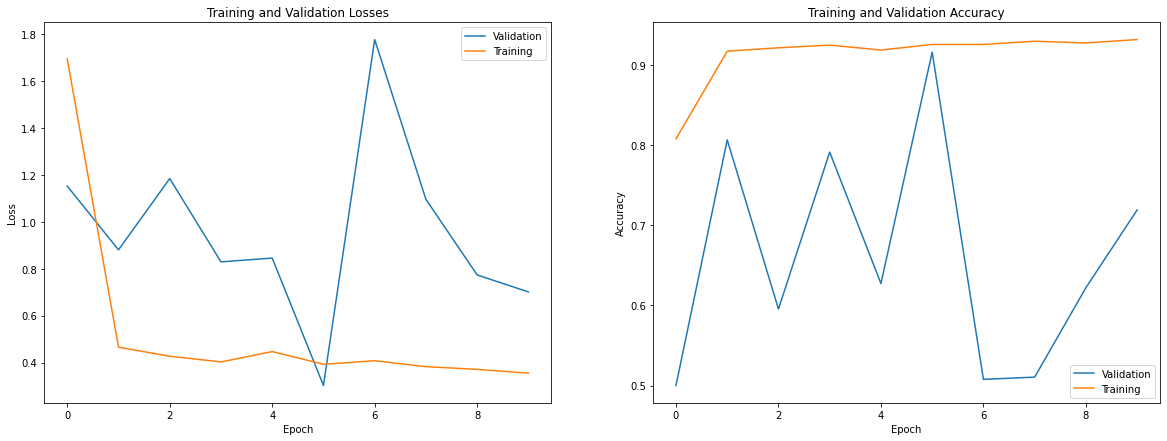

In [0]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))
ax1, ax2 = ax.ravel()

ax1.plot(val_loss, label='Validation')
ax1.plot(train_loss, label='Training')
ax1.set_title('Training and Validation Losses')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(val_accuracy, label='Validation')
ax2.plot(train_accuracy, label='Training')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
plt.show()

# Evaluate the model on the validation set

In [0]:
accuracy = no_skip_conn_model.evaluate_generator(val_generator, verbose=1)
print(f'Validation Accuracy {accuracy[1]}')

78/78 [==============================] - 14s 178ms/step
Validation Accuracy 0.7193548679351807


# Evaluate the best of the two models on the test set

In [0]:
accuracy = skip_conn_model.evaluate_generator(test_generator, verbose=1)
print(f'Test Accuracy {accuracy[1]}')

2756/2756 [==============================] - 22s 8ms/step
Test Accuracy 0.944847583770752


# Comparing the deep models with and without residual connection


As seen above, two deep models were created, inspired by the ResNet architecture. The first consisted of residual/skip connections while the second consisted of the same arhcitecture without skip connections. Both models had 2 * 3 * 3 convolutional layers, 1 initial convolutional layers (outside the ResNet block) and 2 dense layers. Based on the results shown above, both models showed significant variation in their validation scores, as training progressed however, the second model without residual connection, seemed unable to learn. This resulted in the model with residual connections having a validation accuracy of about 94% while without residual connection, the model's trouble learning resulting in a validation accuracy of 71%. The best of the two models was then evaluated on the test setp. The residual connections assisted in training the deep network much more effectively. The final evaluation on the test set resulted in the model with residual connections scoring an accuracy of 94.48%. 